# Bike Sharing Demand Prediction

https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

https://www.kaggle.com/rajmehra03/bike-sharing-demand-rmsle-0-3194


## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. <br>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some 
factors. 

## Business Goal

Model the demand for shared bikes with the available independent variables. <br>
It will be used by the management to understand how exactly the demands vary with different features.



### Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pd.set_option('max_columns', 50)
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10,7)

### Load Dataset and Data Dictionary

In [2]:
# Load Dataset
bikes_df = pd.read_csv('day.csv')
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Load Dictionary

with open('Readme.txt') as file:
    print(file.read())

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

On understanding the dataset and the meaning of the features, we can intially drop a few features from our analysis as 
they will not add any value to the model building. <br>

1.  __instant__: Can be removed as it is just the record index.
2.  __casual__ and __registered__: Can be removed as they are jointly the Target Variabel cnt 

In [4]:
bikes_df.drop(columns=['instant','casual','registered'],inplace=True)

In [5]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


It appears to be the case that there are no missing values in the dataset.

### Descriptive Statistics

In [6]:
bikes_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
bikes_df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [8]:
# Extract day of the month from Dates
bikes_df['dates'] = pd.to_datetime(bikes_df.dteday,format = '%d-%m-%Y').dt.day

In [9]:
# drop dteday
bikes_df.drop(columns=['dteday'],inplace=True)

In [10]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dates
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


Now the continous features as per the dictionary are __temp, atemp, hum, windspeed__. <br/>
And as seen from above, we do not need to make any changes to the data types for these columns.

### Handling Categorical Features

Before proceeding further we have to handle the categorical features.

1.  Replace values in categorical columns with more interpretable values rather than numerical values.
2.  Convert data type of dates column to categorical.
3.  One-Hot Encode the categorical variables.

In [11]:
bikes_df['season'] = bikes_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
bikes_df['mnth'] = bikes_df.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
)

In [13]:
bikes_df['weekday'] = bikes_df.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

In [14]:
bikes_df['holiday'] = bikes_df.holiday.map({0:'not_holiday',1:'holiday'})

In [15]:
bikes_df['workingday'] = bikes_df.workingday.map({0:'non_working_day',1:'working_day'})

In [16]:
# Lets decode the weathersit as follows:
# 1. Clear, Few clouds, Partly cloudy, Partly cloudy : almost_clear
# 2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist : misty
# 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds : lighy_rain_snow
# 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog: extreme


bikes_df['weathersit'] = bikes_df.weathersit.map({1: 'almost_clear', 2: 'misty', 3: 'light_rain_snow',4: 'extreme'})

In [17]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dates
0,spring,0,Jan,not_holiday,saturday,non_working_day,misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,Jan,not_holiday,sunday,non_working_day,misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,Jan,not_holiday,monday,working_day,almost_clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,Jan,not_holiday,tuesday,working_day,almost_clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,Jan,not_holiday,wednesday,working_day,almost_clear,9.305237,11.46350,43.6957,12.522300,1600,5


In [18]:
bikes_df['dates'] = bikes_df.dates.astype('category')

In [19]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    object  
 3   holiday     730 non-null    object  
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    object  
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  dates       730 non-null    category
dtypes: category(1), float64(4), int64(2), object(6)
memory usage: 70.8+ KB


### Exploratory Data Analysis - Categorical Features

In [47]:
def feature_counts(feature,text,set_logscale=False):
    plt.title(f'Top {feature} by count',fontsize = 18)
    total_by_feature = bikes_df.groupby(feature).agg({'cnt':'sum'}).reset_index()
    g =sns.barplot(x = feature,y='cnt',data =total_by_feature)
    if set_logscale:
        g.set_yscale("log")
    plt.ylabel('Count',fontsize = 18)
    plt.xlabel(text,fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xticks(rotation=45,fontsize = 18)
    plt.show()   

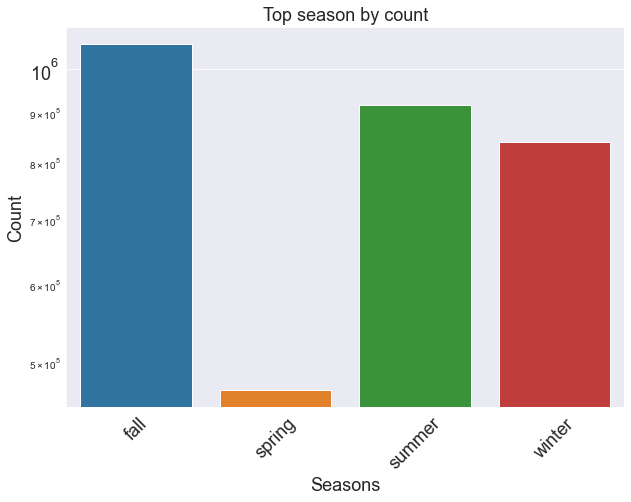

In [48]:
feature_counts('season',text='Seasons',set_logscale=True)

Most bikes sharing data is in the Fall.

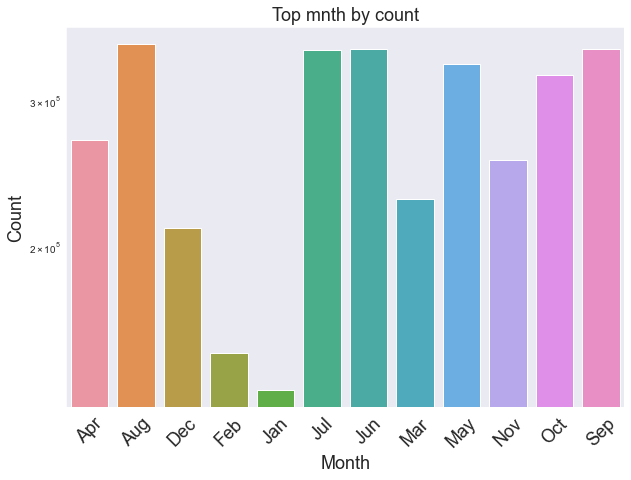

In [49]:
feature_counts('mnth',text='Month',set_logscale=True)

As seen previosly the Fall months September - December have the highest bookings.

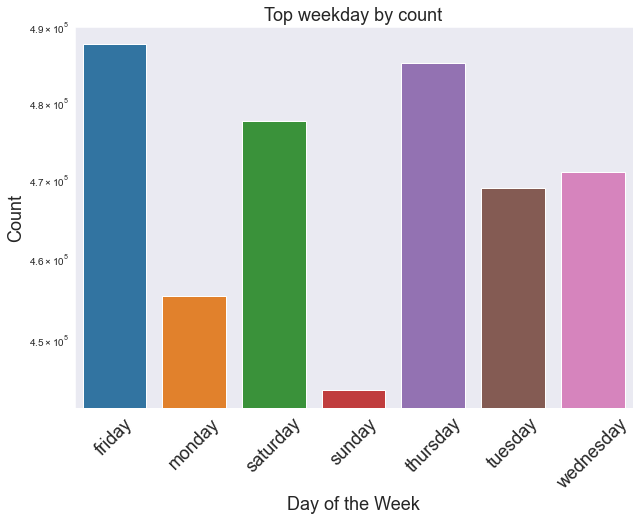

In [53]:
feature_counts('weekday',text='Day of the Week',set_logscale=True)

Fridays see the most bookings followed by Thurdays and Sundays being the least booked day.

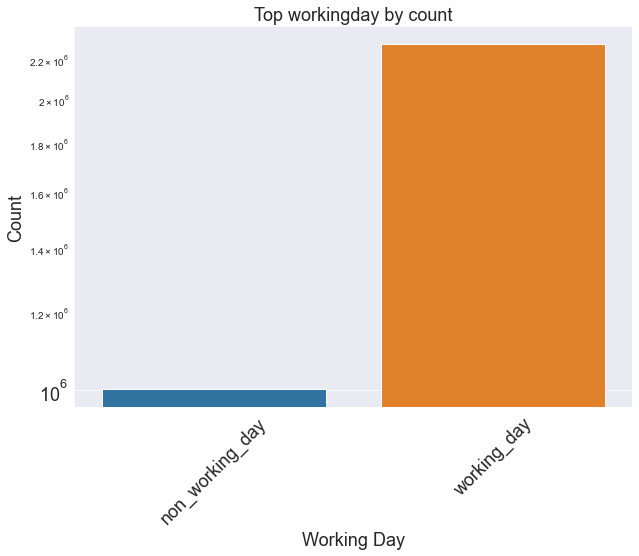

In [54]:
feature_counts('workingday',text='Working Day',set_logscale=True)

The most bookings occur only on Working Days and not on holidays or Weekends.

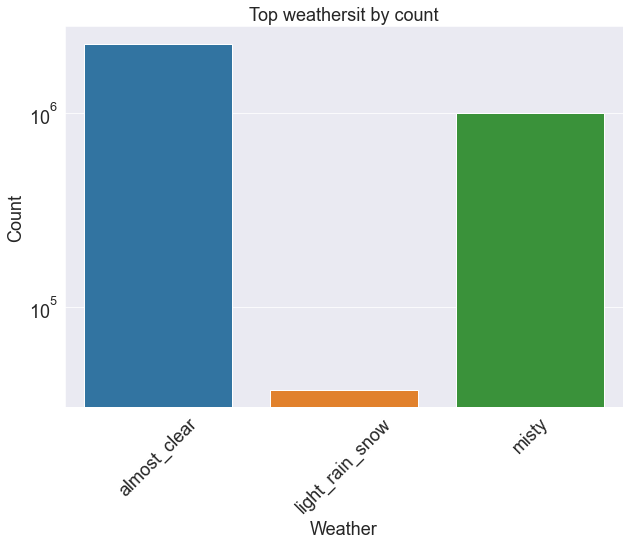

In [55]:
feature_counts('weathersit',text='Weather',set_logscale=True)

People tend to book bikes on Clear Days rather than on Rainy/ Snow fall days.

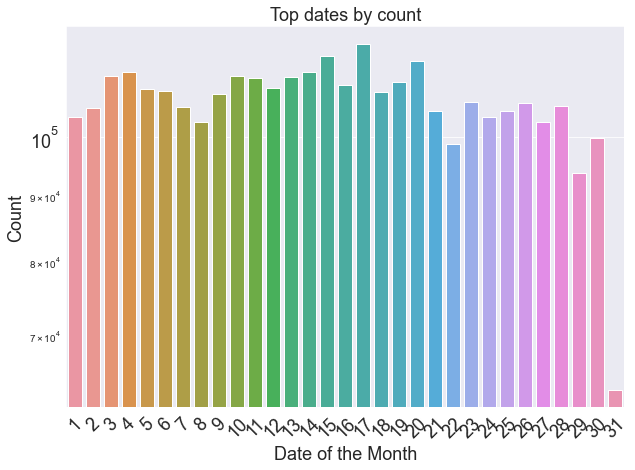

In [56]:
feature_counts('dates',text='Date of the Month',set_logscale=True)

There is an increase in the number of bookings in the middle of the Month and it slowly weakens towards the end of the month. 

### Exploratory Data Analysis - Continous Features

Let us now try to analyze the distribution and correlation of continous features.

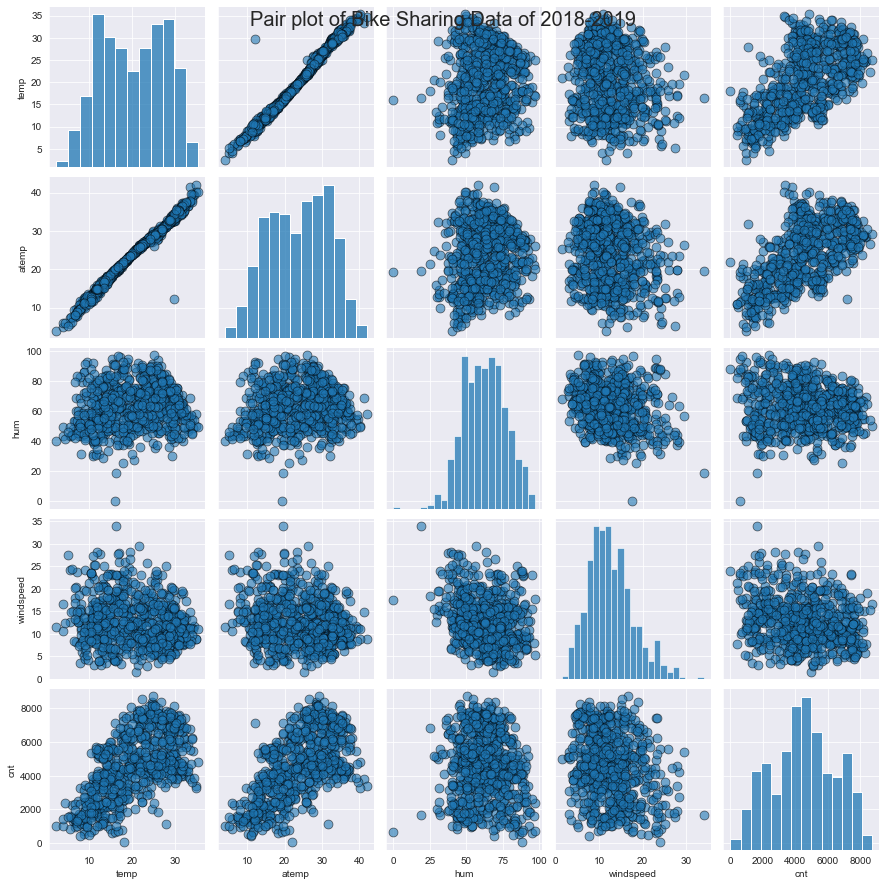

In [67]:
sns.pairplot(data=bikes_df,vars=['temp','atemp','hum','windspeed','cnt'],plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Pair plot of Bike Sharing Data of 2018-2019',size = 20)
plt.show()

There seems to be a very strong postive correlation between __temp__ and __atemp__ columns and slight correlation between these two columns and __cnt__ column.<br>
We can verify this by plotting the correlation.

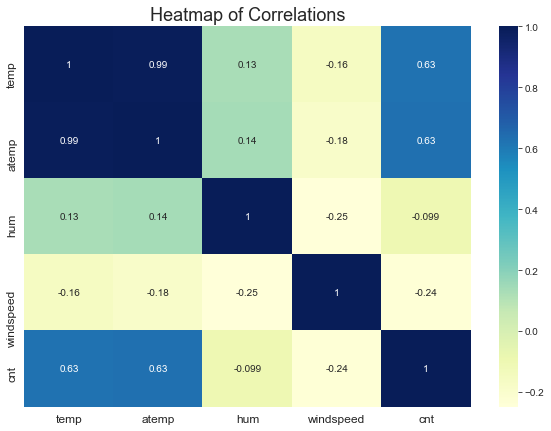

In [83]:
plt.title('Heatmap of Correlations',fontsize =18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(bikes_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu')
plt.show()

So, it is correct that temp and atemp have a high correlation and hence one of them can be dropped.

In [86]:
bikes_df.drop(columns='atemp',inplace=True)

We have mapped all categories respectively, now we will convert them into one-hot encoded format.

In [87]:
bikes_categorical_df = pd.get_dummies(bikes_df,columns=['season','mnth','holiday','weekday','workingday','weathersit'],drop_first=True)

In [88]:
bikes_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   yr                          730 non-null    int64   
 1   temp                        730 non-null    float64 
 2   hum                         730 non-null    float64 
 3   windspeed                   730 non-null    float64 
 4   cnt                         730 non-null    int64   
 5   dates                       730 non-null    category
 6   season_spring               730 non-null    uint8   
 7   season_summer               730 non-null    uint8   
 8   season_winter               730 non-null    uint8   
 9   mnth_Aug                    730 non-null    uint8   
 10  mnth_Dec                    730 non-null    uint8   
 11  mnth_Feb                    730 non-null    uint8   
 12  mnth_Jan                    730 non-null    uint8   
 13  mnth_Jul            

In [89]:
bikes_categorical_df.head()

,yr,temp,hum,windspeed,cnt,dates,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_not_holiday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working_day,weathersit_light_rain_snow,weathersit_misty
0,0,14.110847,80.5833,10.749882,985,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,0,8.200000,59.0435,10.739832,1562,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,0,9.305237,43.6957,12.522300,1600,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
